<a href="https://colab.research.google.com/github/34-anish/Assignment/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split


# Question no. 1
Perceptron Learning Algorithm ***[10 = dataset creation 2 + perceptron learning algorithm 5 + analysis 3]***
<br>
Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D. Note
that you have to create such a dataset with at least 1000 data points. Plot the dataset before and
after training (with the classifier).
Discuss your observations with respect to number of iterations required for perfect classification (k)
by varying the level of separability ( $\gamma$ from the class discussions) in the dataset. (Hint: compute
the average value of k for each level of $\gamma$ and do this for about 5 values of $\gamma$. Observe if you can
relate to the result discussed in class)

## Dataset Creation

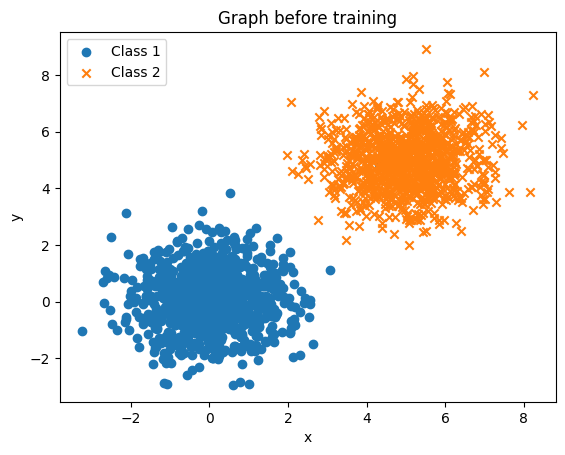

In [ ]:
obs=1000
# Function to synthesize dataset with given level of separability (gamma)
def generate_dataset(gamma, size):
    np.random.seed(42)
    D1 = np.random.normal(0.0, 1.0, size=[size, 2])
    D2 = np.random.normal(gamma, 1.0, size=[size, 2])
    X = np.concatenate((D1, D2), axis=0)
    y = np.concatenate((np.zeros(size), np.ones(size)))
    return X, y
D1,D2=generate_dataset(5,obs)
# Plotting the datasets with labels
plt.title('Graph before training')
plt.scatter(D1[:obs+1, 0], D1[:obs+1, 1], label='Class 1', marker='o')
plt.scatter(D1[obs:, 0], D1[obs:, 1], label='Class 2', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


- Two Gaussian Distributions are drawn which is linearly separable
- For D1, it is generating random numbers from a normal distribution with a mean of 0.0 and a standard deviation of 1.0. The size of the array is defined by the variable 'size' and it creates an array with 2 columns.
- For D2, it is generating random numbers from a normal distribution with a mean of 'gamma' and a standard deviation of 1.0. Similar to D1, the size of the array is defined by the variable 'size' and it also creates an array with 2 column So, the function creates the linearly separable datasetss.

## Perceptron Learning ALgorithm
1. z = wx+b
2. If z >0 :
$ \hat y  =\sigma(z) $
3. if not converged
<br>
    i. w += $\eta .(y - \hat y).x $
    <br>
    ii. b +=  $\eta .(y - \hat y) $

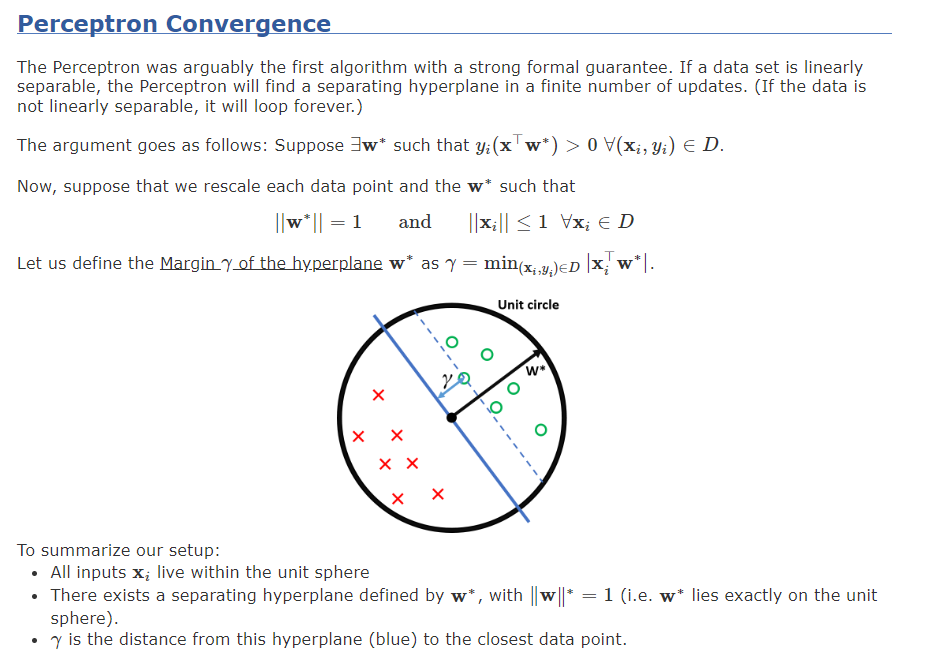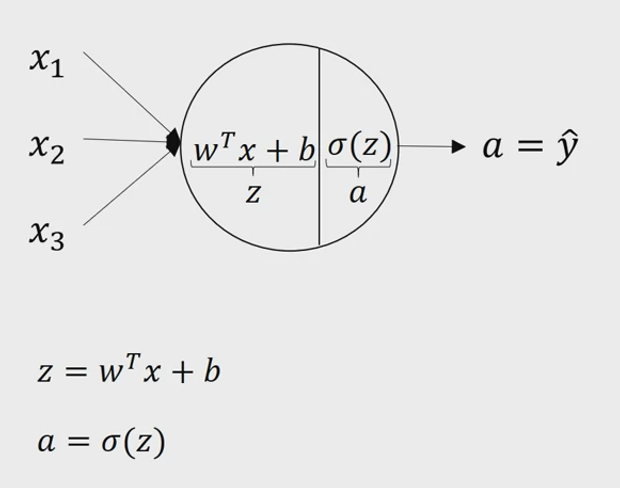
<br>
Source: Andrew NG

Gamma 4.0


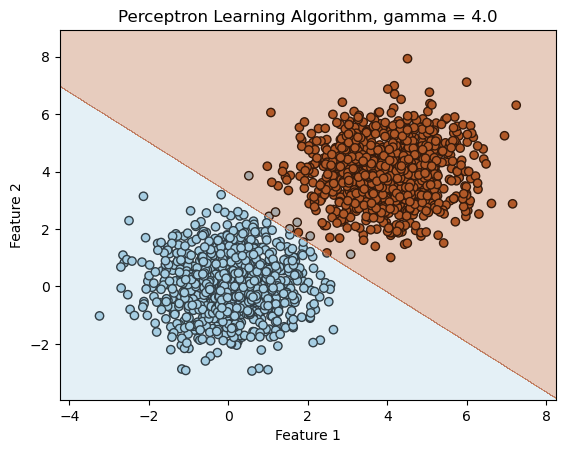

In [ ]:
class Perceptron:
    def __init__(self, num_features, learning_rate=0.01, num_epochs=100):
        self.num_features = num_features
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = np.random.randn(num_features)
        self.bias = np.random.randn(1)

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return np.where(z >= 0, 1, 0)

    def train(self, X_train, y_train):
        converged = False
        iterations = 0
        while not converged and iterations < self.num_epochs:
            converged = True
            for x, y in zip(X_train, y_train):
                a = self.predict(x)
                if y != a:
                    self.weights += self.learning_rate * (y - a) * x
                    self.bias += (y - a)* self.learning_rate
                    converged = False
            iterations += 1
        return iterations

def graph(perceptron, X, y,gamma):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Perceptron Learning Algorithm, gamma = {gamma}')

    plt.show()



gammas = [4.0,4.2,4.4,4.6,4.8,5.0,5.2]
num_iterations = []

for gamma in gammas:
    iterations_list = []
    for _ in range(10):
        X, y = generate_dataset(gamma, obs)
        perceptron = Perceptron(num_features=2)
        iterations = perceptron.train(X, y)
        iterations_list.append(iterations)
    print("Gamma",gamma)
    graph(perceptron, X, y,gamma)
    avg_iterations = np.mean(iterations_list)
    num_iterations.append(avg_iterations)

plt.plot(gammas, num_iterations, marker='o')
plt.xlabel('Level of Separability (gamma)')
plt.ylabel('Average Number of Iterations')
plt.title('Effect of Separability on Perceptron Learning')

# Add gamma values to the x-axis ticks
plt.xticks(gammas)

plt.show()


## Observations
- It takes less number of iterations to converge the datasets with the perceptron learning algorithm with $\gamma$ = 4.6

The convergence of a perceptron refers to the process by which the weights of the perceptron are adjusted during training until they reach values that allow the perceptron to correctly classify the training data. The perceptron convergence theorem states that if the training data is linearly separable, then the perceptron learning algorithm will converge and find a set of weights that correctly classifies all the training examples. However, if the data is not linearly separable, the perceptron may not converge. This is a fundamental concept in the field of artificial neural networks and machine learning and can be seen with the images as well.
<br>
[Source](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html)

# Question no. 2
Gradient descent for training a linear classifier ***[10 = loss formulation 4 + gradient computation 3 + update equation 3]***
<br>
Consider solving the above problem (training a line for classifying a linearly separable 2D dataset)
using Gradient Descent algorithm. Think of a loss function (beyond simple MSE) based on our
classroom discussion on the desirable properties of a loss function. You may implement the an-
alytical way of finding gradient for it. You may implement the basic version of gradient descent
update equation. Plot the dataset before and after training (with the classifier)

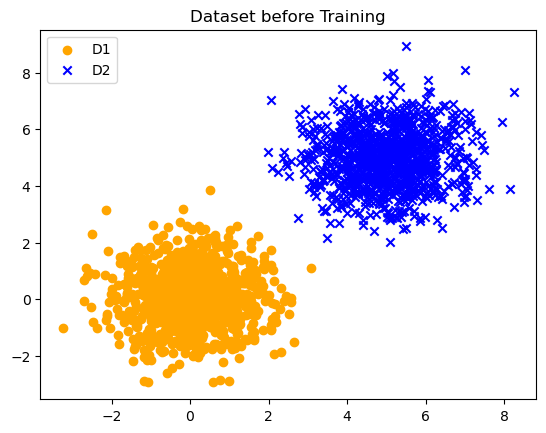

Epoch 0, Loss: 0.6931471805599454
Epoch 100, Loss: 0.32184849744233895
Epoch 200, Loss: 0.25271211720619424
Epoch 300, Loss: 0.2072580923068778
Epoch 400, Loss: 0.17519886428995649
Epoch 500, Loss: 0.15159049290643578
Epoch 600, Loss: 0.1335878358252509
Epoch 700, Loss: 0.11945695344320711
Epoch 800, Loss: 0.1080946594785078
Epoch 900, Loss: 0.09877206167393474
Training complete.


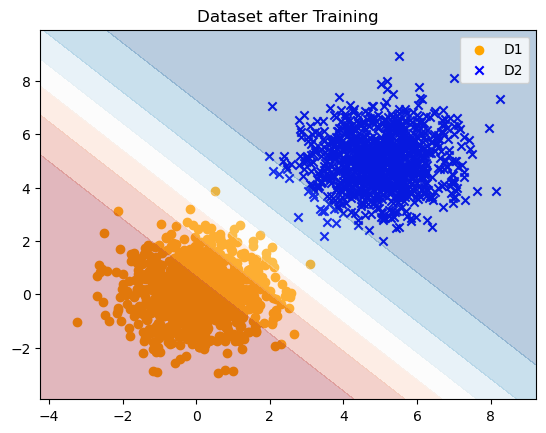

In [ ]:

class GradientDescent:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def calculate_loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def calculate_gradient(self, X, y, y_pred):
      # Analytical gradient for log loss
      error = y_pred - y
      gradient_weights = np.dot(X.T, error) / len(y)
      gradient_bias = np.sum(error) / len(y)
      return gradient_weights, gradient_bias


    def train(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.num_epochs):
            # Forward pass
            y_pred = self.predict(X)

            # Compute loss
            loss = self.calculate_loss(y, y_pred)

            # Compute gradient
            gradient_weights, gradient_bias = self.calculate_gradient(X, y, y_pred)

            # Update weights and bias
            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

        print('Training complete.')

X = D1
y = D2

# Add a column of ones for bias term
X_with_bias = np.c_[np.ones(X.shape[0]), X]

# Plot the dataset before training
plt.scatter(D1[:obs, 0], D1[:obs, 1], label='D1', marker='o',color='orange')
plt.scatter(D1[obs+1:, 0], D1[obs+1:, 1], label='D2', marker='x',color='b')
plt.title('Dataset before Training')
plt.legend()
plt.show()

model = GradientDescent(learning_rate=0.01, num_epochs=1000)
model.train(X_with_bias, y)

# Plot the dataset after training
plt.scatter(D1[:obs, 0], D1[:obs, 1], label='D1', marker='o',color='orange')
plt.scatter(D1[obs+1:, 0], D1[obs+1:, 1], label='D2', marker='x',color='b')
plt.title('Dataset after Training')

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
meshgrid_data = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]
Z = model.predict(meshgrid_data)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)

plt.legend()
plt.show()

# Question no. 3
MLP with a single hidden layer ***[20 = dataset creation 5 + MLP definition 5 + backprop 10]***
<br>
This question has two variations, and you are expected to attempt any one of the variations. The
second variatio n, if implemented properly, will fetch you a 5% bonus on this assignment.
Original Question: Consider a binary classification dataset that is not linearly separable in 2D
(e.g. data lying on the circumference two concentric circles). Train a Multi layer perceptron (MLP)
with a single hidden layer for classifying the same. You may use the loss function used in problem
2. You have to implement the backpropagation algorithm yourself.
 <br>
**Variation**: Implement your own toy autograd engine, and use it to solve the original question.
You are welcome to discuss the approach with TAs if you like.


## Dataset Creation

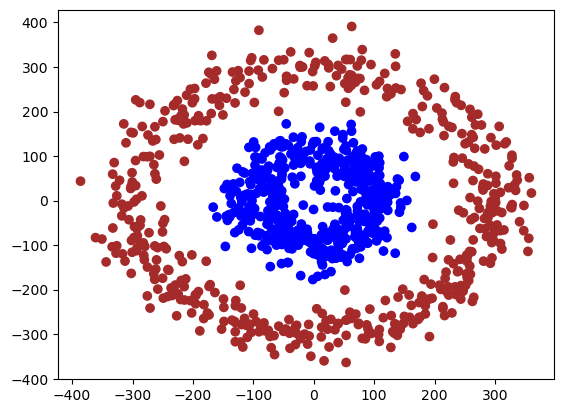

In [ ]:
# Generate the artificial dataset
def non_linear_dataset():
  x = []
  y = []
  z = []
  for i in range(1000):
      rand = np.random.uniform(0.0, 2*math.pi)
      randx = np.random.normal(0.0, 30.0)
      randy = np.random.normal(0.0, 30.0)
      if np.random.random() > 0.5:
          z.append(0)
          x.append(100*math.cos(rand) + randx)
          y.append(100*math.sin(rand) + randy)
      else:
          z.append(1)
          x.append(300*math.cos(rand) + randx)
          y.append(300*math.sin(rand) + randy)
  return x,y,z
x,y,z=non_linear_dataset()
plt.scatter(x, y, c=np.where(np.array(z) == 0, 'blue', 'brown'))
plt.show()

`non_linear_dataset()` generates a synthetic non-linear dataset. The function creates three lists x, y, and z, each containing 1000 elements. The x and y lists store the coordinates of the points, while the z list stores the class labels for each point. The points are generated based on random angles and assigned to different classes. After generating the dataset, the code uses matplotlib to create a scatter plot of the points, with the points colored based on their class labels. The resulting plot visualizes the synthetic non-linear dataset, showing the distribution of points and their class labels.


In [ ]:

# Generate the artificial dataset
def non_linear_dataset():
    x = []
    y = []
    z = []
    for i in range(1000):
        rand = np.random.uniform(0.0, 2 * np.pi)
        randx = np.random.normal(0.0, 30.0)
        randy = np.random.normal(0.0, 30.0)
        if np.random.random() > 0.5:
            z.append(0)
            x.append(100 * np.cos(rand) + randx)
            y.append(100 * np.sin(rand) + randy)
        else:
            z.append(1)
            x.append(300 * np.cos(rand) + randx)
            y.append(300 * np.sin(rand) + randy)
    return np.array(x), np.array(y), np.array(z)

# Get the dataset
x, y, z = non_linear_dataset()

# Combine X and Y into a single input array
dataset = np.column_stack((x, y))

# Normalize the data
dataset = (dataset - dataset.mean(axis=0)) / dataset.std(axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset, z, test_size=0.2, random_state=42)


## Architecture




In [ ]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def log_loss(self, y, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        self.final_output = self.sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y, learning_rate):
        error = y - self.final_output
        d_final_output = error * self.sigmoid_derivative(self.final_output)

        error_hidden = d_final_output.dot(self.weights_hidden_output.T)
        d_hidden_output = error_hidden * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.hidden_output.T.dot(d_final_output) * learning_rate
        self.bias_hidden_output += np.sum(d_final_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(d_hidden_output) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden_output, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            loss = self.log_loss(y, output)
            self.backward(X, y, learning_rate)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        return np.round(self.forward(X))


In [ ]:
# Assuming X_train and y_train are your training data and labels
input_size = X_train.shape[1]
hidden_size = 100
output_size = 1  # Assuming binary classification

mlp = MLP(input_size, hidden_size, output_size)
mlp.train(X_train, y_train.reshape(-1, 1), epochs=1000, learning_rate=0.01)

# Assuming X_test is your test data
predictions = mlp.predict(X_test)
accuracy = np.mean(predictions == y_test.reshape(-1, 1))



Epoch 0, Loss: 1.846265287321524
Epoch 100, Loss: 0.09314352029403951
Epoch 200, Loss: 0.049913974356905956
Epoch 300, Loss: 0.03592244493664074
Epoch 400, Loss: 0.02910500825595264
Epoch 500, Loss: 0.025124751264197505
Epoch 600, Loss: 0.022541921689921026
Epoch 700, Loss: 0.020743653995908787
Epoch 800, Loss: 0.019426216076812795
Epoch 900, Loss: 0.018422747659308538


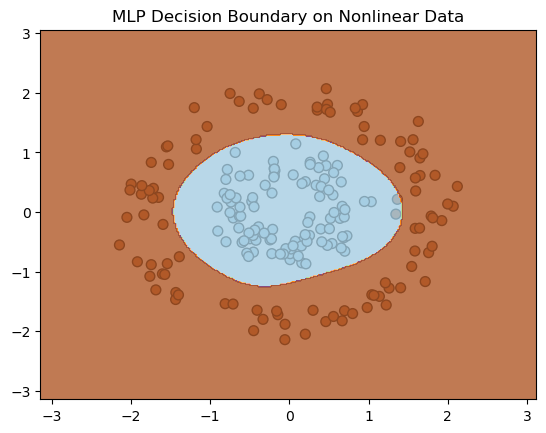

In [ ]:


# Assuming X_test is your test data
predictions = mlp.predict(X_test)

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.title('MLP Decision Boundary on Nonlinear Data')
plt.show()
